## Conversion of CAMBOTv2 L0 natural-color (RGB) images
## to single-channel grayscale (luminance) images

To use ATM's CAMBOTv2 natural-color L0 (raw) images with the Ames Stereo Pipeline ([ASP](https://stereopipeline.readthedocs.io/en/latest/index.html)) they must be converted from RGB (red, green, blue) natural-color images to single-channel grayscale (luminance) images. The ASP user manual offers several ways to do this ([ASP RGB to gray](https://stereopipeline.readthedocs.io/en/latest/sfm.html#example-icebridge-dms-camera)). This Jupyter notebook demonstrates an alternative way for image conversion using the Pillow fork of the [Python Imaging Library](https://pillow.readthedocs.io/en/stable/). 

NASA's Airborne Topographic Mapper (ATM) CAMBOTv2 L0 raw images are freely available from the National Snow and Ice Data Center (data set ID: IOCAM0):  
https://nsidc.org/data/iocam0/versions/1  
DOI: https://doi.org/10.5067/IOJH8A5F48J5  
**NOTE:** Several example images are included in this repository in the folder `data/rgb` and `data/imagery/rgb`.

First, load the required Python™ modules and set up processing options and parameters:

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patheffects as fx

# set processing options
REPLACE = True    # overwrites/replaces existing luminance files if flag is set to True
RENAME  = False   # if True luminance files will have the string "_lum" added at the end of the file names
ADJUST  = True    # if True image enhancement will be applied to Luminance images to bring out lake bottom features for ASP  

# set input and output directories for conversion
f_dir_cam = r".." + os.sep + "data" + os.sep + "imagery"
f_dir_rgb = f_dir_cam + os.sep + "rgb"  # directory with original RGB images
f_dir_lum = f_dir_cam + os.sep + "lum"  # directory with luminance (grayscale) converted images

# check if above directories exist and if not create directory for output files
if os.path.exists(f_dir_rgb):
    if os.path.exists(f_dir_lum) == False:
        os.makedirs(f_dir_lum)
        print("Created new folder for output files: {}".format(f_dir_lum))
else:
    os.sys.exit("Directory with CAMBOTv2 RGB files not found. Check directory paths.")

Now get list of images to convert and save converted images in a subfolder folder called `./lum`:

In [2]:
# get list with names of CAMBOTv2 L0 .jpg files to convert
# r = root, d = directories, f = files

for r, d, f in os.walk(f_dir_rgb): 
    for file in f:
        if (file.startswith("IOCAM0") & file.endswith(".jpg")):
            f_name_inp = f_dir_rgb + os.sep + file
            f_name_out = f_dir_lum + os.sep + file
            f_name_tmp = os.path.splitext(f_name_out)
            if RENAME:
                f_name_lum = f_name_tmp[0] + "_lum" + f_name_tmp[1]
            else:
                f_name_lum = f_name_tmp[0] + f_name_tmp[1]
                
            del f_name_out, f_name_tmp
            
            if os.path.exists(f_name_lum) == False or REPLACE == True:
                print("Converting file: {}".format(file))
                # open the RGB image
                image_rgb = Image.open(f_name_inp)
                # get EXIF info
                exif = image_rgb.info['exif']
                # convert the RGB image to grayscale
                image_gray =  image_rgb.convert("L") # L stands for luminance
                
                if ADJUST:
                    from PIL import ImageEnhance
                    # first, enhance brightness
                    enhancer = ImageEnhance.Brightness(image_gray)
                    image_gray = enhancer.enhance(1.2) # brightens the image    
                    # next, enhance contrast
                    enhancer = ImageEnhance.Contrast(image_gray)
                    image_gray = enhancer.enhance(1.2)
                    # save the enhanced grayscale image with EXIF info
                    image_gray.save(f_name_lum, exif=exif)
                else:
                    # save the grayscale image with EXIF info
                    image_gray.save(f_name_lum, exif=exif)

Converting file: IOCAM0_2019_GR_NASA_20190506-131614.4217.jpg
Converting file: IOCAM0_2019_GR_NASA_20190506-131614.9217.jpg


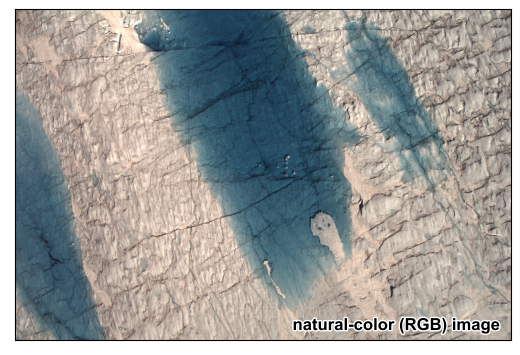

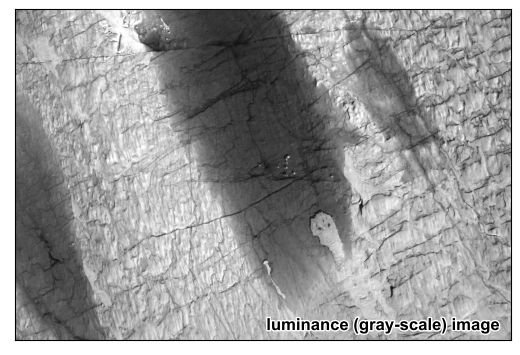

In [3]:
# enhance brightness for display
indx = image_gray.size

enhancer  = ImageEnhance.Brightness(image_rgb)
rgb_adj   = enhancer.enhance(1.2) # brightens the image
# enhance contrast for display
enhancer  = ImageEnhance.Contrast(rgb_adj)
rgb_adj   = enhancer.enhance(1.1) # slightly increases contrast
# enhance sharpness for display
enhancer  = ImageEnhance.Sharpness(rgb_adj)
rgb_adj   = enhancer.enhance(8.5) # slightly increases sharpness

fig1, (ax1)  = plt.subplots(1, 1, subplot_kw = {'xticks': [], 'yticks': []}) 
handle1_ax1 = ax1.imshow(rgb_adj)
handle2_ax1 = ax1.text(indx[0]-100,indx[1]-100, "natural-color (RGB) image", fontsize = 'large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'k')
handle2_ax1.set_path_effects([fx.Stroke(linewidth=2.0, foreground='1.0'),fx.Normal()])

fig2, (ax2)  = plt.subplots(1, 1, subplot_kw = {'xticks': [], 'yticks': []}) 
handle2_ax2 = ax2.imshow(image_gray,cmap = 'gray')
handle2_ax2 = ax2.text(indx[0]-100,indx[1]-100, "luminance (gray-scale) image", fontsize = 'large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'k')
handle2_ax2.set_path_effects([fx.Stroke(linewidth=2.0, foreground='1.0'),fx.Normal()])

In [4]:
# read EXIF (Exchangeable Image File Format) information
exif_numeric = image_rgb._getexif()
print(" ")

print("EXIF (Exchangeable Image File Format) information:\n")
t1 = exif_numeric[36868].replace("\x00","")
t2 = exif_numeric[37522].replace("\x00","")
print(f'Time digitized: {t1:s}.{t2:s}')
print(f'Camera model  : {exif_numeric[271].replace("x00",""):s}, Model: {exif_numeric[272]:s}')
print(f'Lens model    : {exif_numeric[42035]:s}, {exif_numeric[42036]:s}, Serial Number: {exif_numeric[42037]:s}')

 
EXIF (Exchangeable Image File Format) information:

Time digitized: 2019:05:06 13:16:14.9217
Camera model  : Allied Vision Technologies     , Model: GT4905C                        
Lens model    : Carl Zeiss                     , Distagon 2/28 ZF.2             , Serial Number: 51500462                       
